Chức năng của File: Huấn luyện mô hình trên các tập dữ liệu đã giảm chiều có tỷ lệ train/validation khác nhau, không áp dụng hiệu chỉnh L2 và tính toán các chỉ số trên tập validation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import time
import seaborn as sns
from sklearn.decomposition import PCA
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X, y), (X_test, y_test) = fashion_mnist.load_data()

X = X.reshape(X.shape[0], -1)
X = X.astype('float32') / 255.0

X_test = X_test.reshape(X_test.shape[0], -1)
X_test = X_test.astype('float32') / 255.0

In [9]:
fashion_mnist_labels = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

In [15]:
def evaluate(y_true, y_pred, data_set_name):

  print(f'----------------{data_set_name}----------------')
  accuracy_logReg = accuracy_score(y_true, y_pred)
  print(f'Accuracy: {accuracy_logReg:.3f}')

  precision_logReg = precision_score(y_true, y_pred, average='weighted')
  print(f'Precision: {precision_logReg:.3f}')

  recall_logReg = recall_score(y_true, y_pred, average='weighted')
  print(f'Recall: {recall_logReg:.3f}')

  confusion_matrix_logReg = confusion_matrix(y_true, y_pred)
  print('Confusion Matrix:\n', confusion_matrix_logReg)

  print(classification_report(y_true, y_pred, target_names=fashion_mnist_labels))

def create_data(X, y, X_test, n_components=100, test_size=0.2):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)

    if n_components < 100:
        pca = PCA(n_components=n_components)
        X_train = pca.fit_transform(X_train)
        X_val = pca.transform(X_val)
        X_test = pca.transform(X_test)
    return X_train, X_val, y_train, y_val, X_test

def train_predict_evaluate_each_parameter(X_train, y_train, X_test, y_test, solver='lbfgs', max_iter=10000, penalty=None, tol=1e-4, verbose=0, C=1):

  model_logReg = LogisticRegression(multi_class='multinomial', solver=solver, max_iter=max_iter, penalty=penalty, tol=tol, verbose=verbose, C=C)
  model_logReg.fit(X_train, y_train)

  y_pred_training = model_logReg.predict(X_train)
  evaluate(y_train, y_pred_training, 'Trainning set')

  y_pred_testing = model_logReg.predict(X_test)
  evaluate(y_test, y_pred_testing, 'Validation set')

***Không sử dụng hiệu chỉnh L2***

Ty le 4/1

In [17]:
# Với tỷ lệ train/validation : 4/1
X_train, X_val, y_train, y_val, X_test41 = create_data(X=X, y=y, X_test=X_test, n_components=46, test_size=0.2)
X_train.shape, X_val.shape, X_test41.shape

((48000, 46), (12000, 46), (10000, 46))

In [19]:
# solver 'lbfgs' voi ty le 4/1
train_predict_evaluate_each_parameter(X_train, y_train, X_val, y_val, solver='lbfgs', verbose=1)

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


----------------Trainning set----------------
Accuracy: 0.841
Precision: 0.839
Recall: 0.841
Confusion Matrix:
 [[3942   19   75  272   24    8  402    1   55    2]
 [  16 4608   25  115   14    0   20    0    1    1]
 [  52   18 3453   44  659    1  526    0   47    0]
 [ 204   59   26 4156  160    1  176    1   17    0]
 [  12    9  446  171 3631    1  505    1   24    0]
 [   2    1    0    1    0 4457    0  227   28   84]
 [ 783   11  591  180  497    0 2647    1   89    1]
 [   0    0    0    0    0  172    0 4427    8  193]
 [  15    4   23   42    9   29  129   20 4525    4]
 [   0    0    2    2    1   78    2  206    6 4503]]
              precision    recall  f1-score   support

 T-shirt/top       0.78      0.82      0.80      4800
     Trouser       0.97      0.96      0.97      4800
    Pullover       0.74      0.72      0.73      4800
       Dress       0.83      0.87      0.85      4800
        Coat       0.73      0.76      0.74      4800
      Sandal       0.94      0.9

In [21]:
# solver 'saga' voi ty le 4/1
train_predict_evaluate_each_parameter(X_train, y_train, X_val, y_val, solver='saga', verbose=1)

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


convergence after 266 epochs took 25 seconds
----------------Trainning set----------------
Accuracy: 0.840
Precision: 0.839
Recall: 0.840
Confusion Matrix:
 [[3941   19   74  273   24   10  402    0   55    2]
 [  15 4606   26  115   14    0   20    2    1    1]
 [  52   17 3454   43  658    1  527    0   48    0]
 [ 204   57   26 4155  162    1  176    1   17    1]
 [  12    9  446  171 3633    1  505    1   22    0]
 [   3    1    0    2    0 4449    0  229   29   87]
 [ 782   12  593  179  496    0 2647    2   88    1]
 [   0    0    0    0    0  177    0 4418    8  197]
 [  16    4   23   42    9   30  127   20 4525    4]
 [   0    0    2    1    1   80    2  210    6 4498]]
              precision    recall  f1-score   support

 T-shirt/top       0.78      0.82      0.80      4800
     Trouser       0.97      0.96      0.97      4800
    Pullover       0.74      0.72      0.73      4800
       Dress       0.83      0.87      0.85      4800
        Coat       0.73      0.76      0.

In [ ]:
# solver 'sag' voi ty le 4/1
train_predict_evaluate_each_parameter(X_train, y_train, X_val, y_val, solver='sag', verbose=1)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


convergence after 165 epochs took 17 seconds
----------------Trainning set----------------
Accuracy: 0.840
Precision: 0.839
Recall: 0.840
Confusion Matrix:
 [[3941   19   75  272   24   10  402    0   55    2]
 [  16 4606   26  116   14    0   20    0    1    1]
 [  52   17 3454   44  658    1  526    0   48    0]
 [ 204   57   26 4156  161    1  176    1   17    1]
 [  12    9  446  171 3632    1  505    1   23    0]
 [   3    1    0    1    0 4453    0  228   28   86]
 [ 781   12  591  180  496    0 2648    2   89    1]
 [   0    0    0    0    0  176    0 4422    8  194]
 [  16    4   23   42    9   31  126   20 4525    4]
 [   0    0    2    2    1   79    2  209    6 4499]]
              precision    recall  f1-score   support

 T-shirt/top       0.78      0.82      0.80      4800
     Trouser       0.97      0.96      0.97      4800
    Pullover       0.74      0.72      0.73      4800
       Dress       0.83      0.87      0.85      4800
        Coat       0.73      0.76      0.

Ty le 7/3

In [ ]:
# Với tỷ lệ train/validation : 7/3
X_train1, X_val1, y_train1, y_val1, X_test1 = create_data(X=X, y=y, X_test=X_test, n_components=46, test_size=0.3)
X_train1.shape, X_val1.shape, X_test1.shape

((42000, 46), (18000, 46), (10000, 46))

In [ ]:
# solver 'lbfgs' voi ty le 7/3
train_predict_evaluate_each_parameter(X_train1, y_train1, X_val1, y_val1, solver='lbfgs', verbose=1)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


----------------Trainning set----------------
Accuracy: 0.841
Precision: 0.839
Recall: 0.841
Confusion Matrix:
 [[3452   17   67  239   24    8  337    1   53    2]
 [  14 4035   24   94   13    0   17    1    1    1]
 [  50   15 3023   39  581    1  452    0   39    0]
 [ 169   51   24 3636  148    1  157    0   13    1]
 [  11    8  386  153 3178    1  437    1   25    0]
 [   3    1    0    1    0 3907    0  196   19   73]
 [ 684   11  519  167  430    0 2311    1   76    1]
 [   0    0    0    0    0  151    0 3867    8  174]
 [  15    4   20   36    7   26  109   17 3963    3]
 [   1    0    1    2    1   64    2  186    6 3937]]
              precision    recall  f1-score   support

 T-shirt/top       0.78      0.82      0.80      4200
     Trouser       0.97      0.96      0.97      4200
    Pullover       0.74      0.72      0.73      4200
       Dress       0.83      0.87      0.85      4200
        Coat       0.73      0.76      0.74      4200
      Sandal       0.94      0.9

In [ ]:
# solver 'saga' voi ty le 7/3
train_predict_evaluate_each_parameter(X_train1, y_train1, X_val1, y_val1, solver='saga', verbose=1)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


convergence after 315 epochs took 42 seconds
----------------Trainning set----------------
Accuracy: 0.840
Precision: 0.839
Recall: 0.840
Confusion Matrix:
 [[3450   18   66  240   24    8  339    0   53    2]
 [  15 4035   24   93   13    0   17    1    1    1]
 [  49   15 3021   38  582    1  455    0   39    0]
 [ 170   52   24 3632  149    1  157    1   13    1]
 [  11    8  385  152 3178    1  439    1   25    0]
 [   3    1    0    2    0 3899    0  196   25   74]
 [ 683   12  520  166  427    0 2313    2   76    1]
 [   0    0    0    0    0  156    0 3855    9  180]
 [  16    4   20   36    7   24  110   18 3961    4]
 [   1    0    1    1    1   64    2  186    7 3937]]
              precision    recall  f1-score   support

 T-shirt/top       0.78      0.82      0.80      4200
     Trouser       0.97      0.96      0.97      4200
    Pullover       0.74      0.72      0.73      4200
       Dress       0.83      0.86      0.85      4200
        Coat       0.73      0.76      0.

In [ ]:
# solver 'sag' voi ty le 7/3
train_predict_evaluate_each_parameter(X_train1, y_train1, X_val1, y_val1, solver='sag', verbose=1)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


convergence after 195 epochs took 16 seconds
----------------Trainning set----------------
Accuracy: 0.841
Precision: 0.839
Recall: 0.841
Confusion Matrix:
 [[3451   18   66  238   24    9  339    0   53    2]
 [  15 4036   23   93   13    0   17    1    1    1]
 [  50   15 3022   38  581    1  454    0   39    0]
 [ 169   52   24 3634  148    1  157    1   13    1]
 [  11    8  385  152 3178    1  439    1   25    0]
 [   3    1    0    2    0 3903    0  194   23   74]
 [ 683   11  520  166  428    0 2313    1   77    1]
 [   0    0    0    0    0  151    0 3865    8  176]
 [  15    4   20   36    7   26  109   17 3962    4]
 [   1    0    1    1    1   65    2  185    6 3938]]
              precision    recall  f1-score   support

 T-shirt/top       0.78      0.82      0.80      4200
     Trouser       0.97      0.96      0.97      4200
    Pullover       0.74      0.72      0.73      4200
       Dress       0.83      0.87      0.85      4200
        Coat       0.73      0.76      0.

Ty le 6/4

In [ ]:
# Với tỷ lệ train/validation : 6/4
X_train2, X_val2, y_train2, y_val2, X_test2 = create_data(X=X, y=y, X_test=X_test, n_components=46, test_size=0.4)
X_train2.shape, X_val2.shape, X_test2.shape

((36000, 46), (24000, 46), (10000, 46))

In [ ]:
# solver 'lbfgs' voi ty le 6/4
train_predict_evaluate_each_parameter(X_train2, y_train2, X_val2, y_val2, solver='lbfgs', verbose=1)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


----------------Trainning set----------------
Accuracy: 0.840
Precision: 0.839
Recall: 0.840
Confusion Matrix:
 [[2962   15   58  202   18    8  292    0   43    2]
 [  13 3470   14   77    9    0   15    1    0    1]
 [  44   12 2576   31  494    1  403    0   39    0]
 [ 142   46   21 3111  126    1  140    1   12    0]
 [  11    6  334  135 2709    1  382    1   21    0]
 [   3    1    0    1    0 3348    0  174   13   60]
 [ 592    8  442  138  377    0 1979    1   62    1]
 [   0    1    0    0    0  133    0 3314    6  146]
 [  13    3   17   32    5   17   94   13 3402    4]
 [   1    0    1    2    1   54    1  162    5 3373]]
              precision    recall  f1-score   support

 T-shirt/top       0.78      0.82      0.80      3600
     Trouser       0.97      0.96      0.97      3600
    Pullover       0.74      0.72      0.73      3600
       Dress       0.83      0.86      0.85      3600
        Coat       0.72      0.75      0.74      3600
      Sandal       0.94      0.9

In [ ]:
# solver 'saga' voi ty le 6/4
train_predict_evaluate_each_parameter(X_train2, y_train2, X_val2, y_val2, solver='saga', verbose=1)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


convergence after 317 epochs took 32 seconds
----------------Trainning set----------------
Accuracy: 0.840
Precision: 0.838
Recall: 0.840
Confusion Matrix:
 [[2962   15   59  202   17    8  292    0   43    2]
 [  12 3471   15   75    9    0   15    2    0    1]
 [  44   12 2573   31  497    1  403    0   39    0]
 [ 143   47   21 3110  125    1  140    1   12    0]
 [  11    6  334  134 2709    1  383    1   21    0]
 [   3    1    0    1    0 3343    0  171   18   63]
 [ 591   10  441  140  374    0 1977    1   65    1]
 [   0    1    0    0    0  132    0 3313    7  147]
 [  13    3   17   32    5   17   95   14 3400    4]
 [   1    0    1    1    1   53    2  164    5 3372]]
              precision    recall  f1-score   support

 T-shirt/top       0.78      0.82      0.80      3600
     Trouser       0.97      0.96      0.97      3600
    Pullover       0.74      0.71      0.73      3600
       Dress       0.83      0.86      0.85      3600
        Coat       0.72      0.75      0.

In [ ]:
# solver 'sag' voi ty le 6/4
train_predict_evaluate_each_parameter(X_train2, y_train2, X_val2, y_val2, solver='sag', verbose=1)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


convergence after 222 epochs took 20 seconds
----------------Trainning set----------------
Accuracy: 0.840
Precision: 0.839
Recall: 0.840
Confusion Matrix:
 [[2962   15   59  202   17    8  292    0   43    2]
 [  13 3471   15   75    9    0   15    1    0    1]
 [  44   12 2574   31  496    1  403    0   39    0]
 [ 143   47   21 3110  125    1  140    1   12    0]
 [  11    6  334  134 2711    1  381    1   21    0]
 [   3    1    0    1    0 3346    0  172   15   62]
 [ 591   10  439  141  375    0 1977    1   65    1]
 [   0    1    0    0    0  132    0 3316    6  145]
 [  13    3   17   32    5   17   94   14 3401    4]
 [   1    0    1    1    1   54    2  162    5 3373]]
              precision    recall  f1-score   support

 T-shirt/top       0.78      0.82      0.80      3600
     Trouser       0.97      0.96      0.97      3600
    Pullover       0.74      0.71      0.73      3600
       Dress       0.83      0.86      0.85      3600
        Coat       0.73      0.75      0.

tách ra

In [ ]:
X_train, X_test, y_train, y_test = create_data(X, y, n_components=0.9, test_size=0.2)
train_predict_evaluate_each_param(X_train, y_train, X_test, y_test, solver='lbfgs', verbose=1)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


----------------Trainning set----------------
Accuracy: 0.853
Precision: 0.852
Recall: 0.853
Confusion Matrix:
 [[4635   16   94  268   26   12  487    0   59    3]
 [  15 5399   30  120   11    0   21    1    2    1]
 [  71   16 4154   63  706    1  546    1   41    1]
 [ 207   60   62 4904  176    2  171    0   18    0]
 [  10    9  505  213 4318    1  518    1   25    0]
 [   1    1    1    3    0 5264    1  238   20   71]
 [ 841   10  625  191  563    1 3261    0  108    0]
 [   0    0    0    1    0  191    0 5218    5  185]
 [  25    6   22   45   16   18  118   24 5323    3]
 [   0    1    0    4    0   78    0  212    5 5300]]
              precision    recall  f1-score   support

 T-shirt/top       0.80      0.83      0.81      5600
     Trouser       0.98      0.96      0.97      5600
    Pullover       0.76      0.74      0.75      5600
       Dress       0.84      0.88      0.86      5600
        Coat       0.74      0.77      0.76      5600
      Sandal       0.95      0.9

In [ ]:
X_train, X_test, y_train, y_test = create_data(X, y, n_components=0.9, test_size=0.3)
train_predict_evaluate_each_param(X_train, y_train, X_test, y_test, solver='lbfgs', verbose=1)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


----------------Trainning set----------------
Accuracy: 0.853
Precision: 0.852
Recall: 0.853
Confusion Matrix:
 [[4055   15   75  243   23    9  426    0   52    2]
 [  11 4730   23   98   14    0   21    1    2    0]
 [  60   17 3645   53  625    0  472    1   27    0]
 [ 183   61   55 4282  158    1  144    0   16    0]
 [  10    7  454  185 3759    2  456    0   27    0]
 [   1    0    1    3    0 4608    0  211   12   64]
 [ 732    9  537  164  494    1 2868    0   95    0]
 [   0    0    0    0    0  167    0 4562    6  165]
 [  17    7   20   40   15   13  100   21 4665    2]
 [   0    0    0    2    0   78    0  190    4 4626]]
              precision    recall  f1-score   support

 T-shirt/top       0.80      0.83      0.81      4900
     Trouser       0.98      0.97      0.97      4900
    Pullover       0.76      0.74      0.75      4900
       Dress       0.84      0.87      0.86      4900
        Coat       0.74      0.77      0.75      4900
      Sandal       0.94      0.9

In [ ]:
X_train, X_test, y_train, y_test = create_data(X, y, n_components=0.9, test_size=0.4)
train_predict_evaluate_each_param(X_train, y_train, X_test, y_test, solver='lbfgs', verbose=1)

In [ ]:
X_train, X_test, y_train, y_test = create_data(X, y, n_components=1, test_size=0.2)
train_predict_evaluate_each_param(X_train, y_train, X_test, y_test, solver='sag', verbose=1)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


convergence after 936 epochs took 1982 seconds
----------------Trainning set----------------
Accuracy: 0.885
Precision: 0.884
Recall: 0.885
Confusion Matrix:
 [[4795   11   74  214   23    1  441    0   41    0]
 [  13 5483    8   79    7    0    9    0    1    0]
 [  77    6 4411   48  588    0  449    0   21    0]
 [ 159   37   41 5074  151    0  123    0   15    0]
 [  14    5  470  160 4544    0  387    0   20    0]
 [   0    0    0    1    0 5423    1  148    3   24]
 [ 714   10  549  163  445    0 3651    0   68    0]
 [   0    0    0    0    0  132    0 5342    5  121]
 [  11    2   17   28   13    7   71    8 5443    0]
 [   0    0    0    0    0   33    0  158    3 5406]]
              precision    recall  f1-score   support

 T-shirt/top       0.83      0.86      0.84      5600
     Trouser       0.99      0.98      0.98      5600
    Pullover       0.79      0.79      0.79      5600
       Dress       0.88      0.91      0.89      5600
        Coat       0.79      0.81      

In [ ]:
X_train, X_test, y_train, y_test = create_data(X, y, n_components=1, test_size=0.2)
train_predict_evaluate_each_param(X_train, y_train, X_test, y_test, solver='sag', penalty='l2', C=0.1, verbose=1)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


convergence after 252 epochs took 459 seconds
----------------Trainning set----------------
Accuracy: 0.873
Precision: 0.872
Recall: 0.873
Confusion Matrix:
 [[4734   13   78  232   18   11  462    0   50    2]
 [  16 5443   16   97    9    0   16    1    2    0]
 [  78    9 4349   53  613    4  460    0   34    0]
 [ 166   44   44 5032  167    0  128    2   17    0]
 [  12    6  462  168 4509    1  423    0   19    0]
 [   1    0    1    3    0 5313    1  201   21   59]
 [ 749    9  595  164  458    1 3538    0   86    0]
 [   0    0    0    0    0  157    0 5282    7  154]
 [  20    3   23   39   18   23   85   26 5358    5]
 [   0    1    0    2    0   63    0  181    6 5347]]
              precision    recall  f1-score   support

 T-shirt/top       0.82      0.85      0.83      5600
     Trouser       0.98      0.97      0.98      5600
    Pullover       0.78      0.78      0.78      5600
       Dress       0.87      0.90      0.88      5600
        Coat       0.78      0.81      0

In [ ]:
X_train, X_test, y_train, y_test = create_data(X, y, n_components=1, test_size=0.2)
train_predict_evaluate_each_param(X_train, y_train, X_test, y_test, solver='saga', verbose=1)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


convergence after 927 epochs took 2393 seconds
----------------Trainning set----------------
Accuracy: 0.884
Precision: 0.883
Recall: 0.884
Confusion Matrix:
 [[4785   10   80  211   21    4  445    0   43    1]
 [  14 5477    8   83    7    0   10    0    1    0]
 [  81    7 4397   50  593    0  451    0   21    0]
 [ 154   37   43 5075  153    0  122    0   16    0]
 [  15    5  468  155 4546    0  393    0   18    0]
 [   0    0    0    1    0 5410    1  155    4   29]
 [ 714   11  544  162  447    0 3652    0   70    0]
 [   0    0    0    0    0  133    0 5332    6  129]
 [  12    2   18   31   15   10   75   12 5423    2]
 [   0    0    0    1    0   39    0  162    3 5395]]
              precision    recall  f1-score   support

 T-shirt/top       0.83      0.85      0.84      5600
     Trouser       0.99      0.98      0.98      5600
    Pullover       0.79      0.79      0.79      5600
       Dress       0.88      0.91      0.89      5600
        Coat       0.79      0.81      

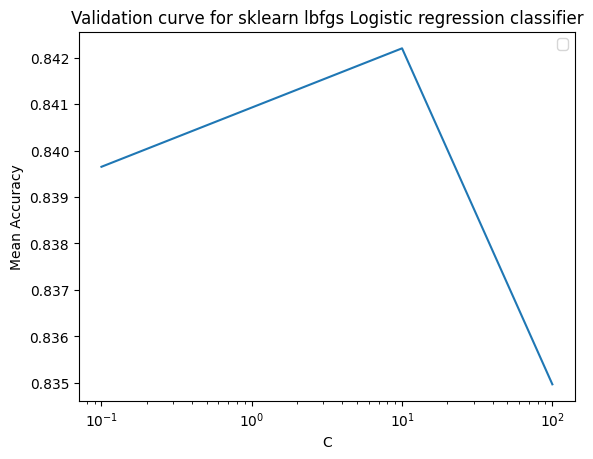

In [ ]:
mean_score = [0.839650, 0.842200, 0.834967]
std_score = [0.002070, 0.000286, 0.007682]
C_list = [0.1, 10, 100]

plt.xlabel("C")
plt.ylabel("Mean Accuracy")
plt.xscale('log')
plt.title("Validation curve for sklearn lbfgs Logistic regression classifier")
plt.plot(C_list, mean_score)
plt.legend(loc="best")
plt.show()

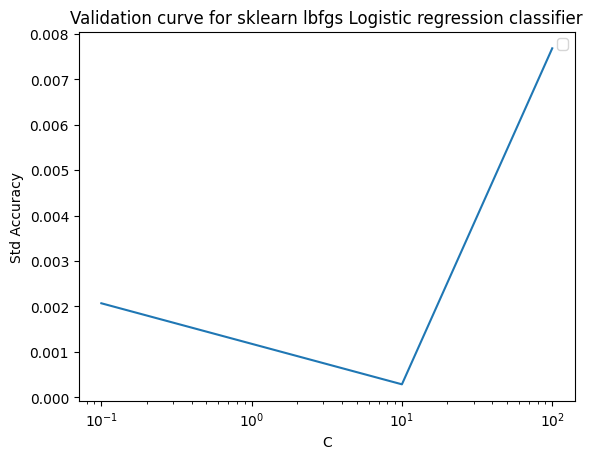

In [ ]:
plt.xlabel("C")
plt.ylabel("Std Accuracy")
plt.xscale('log')
plt.title("Validation curve for sklearn lbfgs Logistic regression classifier")
plt.plot(C_list, std_score)
plt.legend(loc="best")
plt.show()